In [1]:
import pandas as pd
sms_data = pd.read_csv('./spam.csv',usecols=[0,1],encoding='latin-1')

In [2]:
#Explore dataset
print(sms_data.head())
print(sms_data.shape)

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
(5572, 2)


In [3]:
# Check the number of spam and ham messages
sms_data = sms_data.rename(columns = {'v1':'label','v2':'message'})
sms_data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(sms_data.label)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Stemming using Porter algorithm
    2. Remove all punctuation
    3. Remove all stopwords
    4. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [ps.stem(word) for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [6]:
#extract features and labels
sms_features = sms_data['message']
sms_label = sms_data['label']

In [7]:
#Convert raw messages to a matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer=text_process)
sms_features = vectorizer.fit_transform(sms_features)

In [8]:
#Training data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sms_features, sms_label, test_size=0.3, random_state=101)

In [9]:
#Train the model using MultinomialNB algo
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)

[[1464    0]
 [  57  151]]




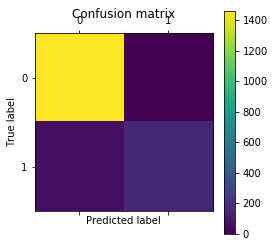

Accuracy:
0.9659090909090909


In [10]:
# Create confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix = confusion_matrix(y_test, nb_preds)
print(confusion_matrix)
print('\n')

from sklearn.metrics import accuracy_score
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print ('Accuracy:')
print(accuracy_score(y_test, nb_preds))


In [11]:
#Train the model using RandomForestClassifier algo
from sklearn.ensemble import RandomForestClassifier
randonForestAlgo = RandomForestClassifier(n_estimators=20)
randonForestAlgo.fit(X_train, y_train)
rf_preds = randonForestAlgo.predict(X_test)


D:\Users\850024011\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[[1463    1]
 [  41  167]]




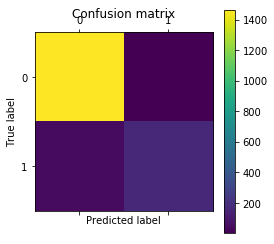

Accuracy:
0.9748803827751196


In [12]:
# Create confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix = confusion_matrix(y_test, rf_preds)
print(confusion_matrix)
print('\n')

plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print ('Accuracy:')
print(accuracy_score(y_test, rf_preds))

In [13]:
test = vectorizer.transform( ['URGENT! Your Mobile No 1234 was awarded a Prize', 'Hey dude, whats up?'] )
predictions = randonForestAlgo.predict(test)
print(predictions)

['spam' 'ham']
